# Appendix C: Linear Regression

While the data is not expected to follow a simple linear trend, a linear regression model was fitted to the data. This will help confirm that a non-linear approach must be used instead.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The data is read into python from a single .csv file containing all of the Victorian data from 2000 to 2020. Only data from 2015 to 2020 is used for analysis.

In [3]:
#%% Reading data
VIC_data = pd.read_csv('VIC_Data_Compiled.csv')
VIC_data.set_index(pd.to_datetime(VIC_data.date), inplace=True)
start = pd.Timestamp("2015-01-01 00:00:00")
end = pd.Timestamp("2020-01-01 00:00:00")
VIC_data = VIC_data[start:end]
VIC_data_full = VIC_data

y = VIC_data.iloc[:, 1].values.reshape(-1,1) #Target variable (energy demand)
X = VIC_data.iloc[:, 3].values.reshape(-1,1) #Feature variable (air temperature)

The data is normalised to ensure accurate modelling, without the differing magnitudes of the variables skewing the model. An 80/20 train-test split is performed on the data before it is modelled.

In [4]:
#%% Normalisation
X = (X-np.mean(X))/np.std(X)
y = (y-np.mean(y))/np.std(y)

In [5]:
#%% T-T Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) 

The model is then fit, and used to calculate goodness of fit and error metrics.

In [6]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

In [7]:
#%% Error Metrics
y_pred = linreg.predict(X_test) 


from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(f"Root Mean Square Error: {RMSE:.4f}")

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {MAE:.4f}")

from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print(f"R2: {R2:.4f}")

Root Mean Square Error: 0.9821
Mean Absolute Error: 0.7957
R2: 0.0208


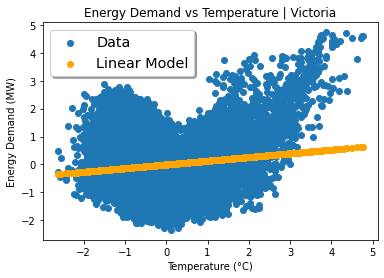

In [8]:
X_plot = X_test
y_plot = y_test 
y_pred_plot = linreg.predict(X_plot) 
y_pred_plot = y_pred_plot

plt.scatter(x = X_plot, y = y_plot, label = "Data")
plt.scatter(X_plot,y_pred_plot, label = "Linear Model", color = 'orange')
plt.title("Energy Demand vs Temperature | Victoria")
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy Demand (MW)")
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

Due to the low goodness of fit, this model will not be used. Instead, non-linear modelling will be undertaken and used to forecast future values. No regularisation or parameter tuning has been undertaken, as there is no reason to continue improving this flawed model.